PairGrid

Функция sns.pairplot() предоставляет удобный способ быстро создать матрицу парных графиков с минимальными настройками. 
Внутри функция sns.pairplot() создает объект PairGrid и выполняет набор предопределенных операций для добавления графиков в сетку. 
То есть функция sns.pairplot() является высокоуровневой "оберткой" вокруг класса PairGrid.

Использование класса PairGrid может быть востребовано в тех случаях, когда необходимы индивидуальные настройки парных графиков, выходящие за рамки возможностей функции sns.pairplot().

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class seaborn.PairGrid(data, *, hue=None, vars=None, x_vars=None, y_vars=None, hue_order=None, palette=None, hue_kws=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0.5, despine=True, dropna=False)

sns.PairGrid()

Основные параметры класса PairGrid:

1) data: DataFrame, содержащий данные для визуализации.
2) hue: Переменная, используемая для разделения данных по цветам. Полезно для отображения категориальных данных.
3) hue_kws: Дополнительные параметры для категорий hue.
4) palette: Цветовая палитра для переменной hue.
5) vars: Список имен переменных для отображения. Если не указано, используются все переменные из data
6) x_vars и y_vars: Списки переменных для отображения на осях X и Y, соответственно. Позволяют создавать асимметричные сетки.
7) height: Высота каждой ячейки в дюймах.
8) aspect: Соотношение сторон каждой ячейки (ширина к высоте).
9) corner: Если True, создает треугольную матрицу парных графиков.
10) diag_sharey: Если True, диагональные подграфики будут иметь общую ось Y.

Основные методы PairGrid:

1) map(func, **kwargs): Применяет функцию func ко всем ячейкам сетки.
2) map_upper(func, **kwargs): Применяет функцию func только к ячейкам в верхнем треугольнике сетки.
3) map_lower(func, **kwargs): Применяет функцию func только к ячейкам в нижнем треугольнике сетки.
4) map_diag(func, **kwargs): Применяет функцию func только к диагональным ячейкам сетки.
5) map_offdiag(func, **kwargs): Применяет функцию func к ячейкам сетки вне диагонали.
6) add_legend(**kwargs): Добавляет легенду к сетке. Полезно при использовании параметра hue для категориальных данных.
7) set_titles(template=None, row_template=None, col_template=None, **kwargs): Устанавливает заголовки для рядов и колонок сетки.
8) apply(func, *args, **kwargs): Позволяет применять произвольную функцию к каждой ячейке сетки.
9) fig: Доступ к объекту Figure matplotlib, что позволяет делать дополнительные настройки фигуры.
10) savefig(filename, **kwargs): Сохраняет объект в файл.

In [8]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


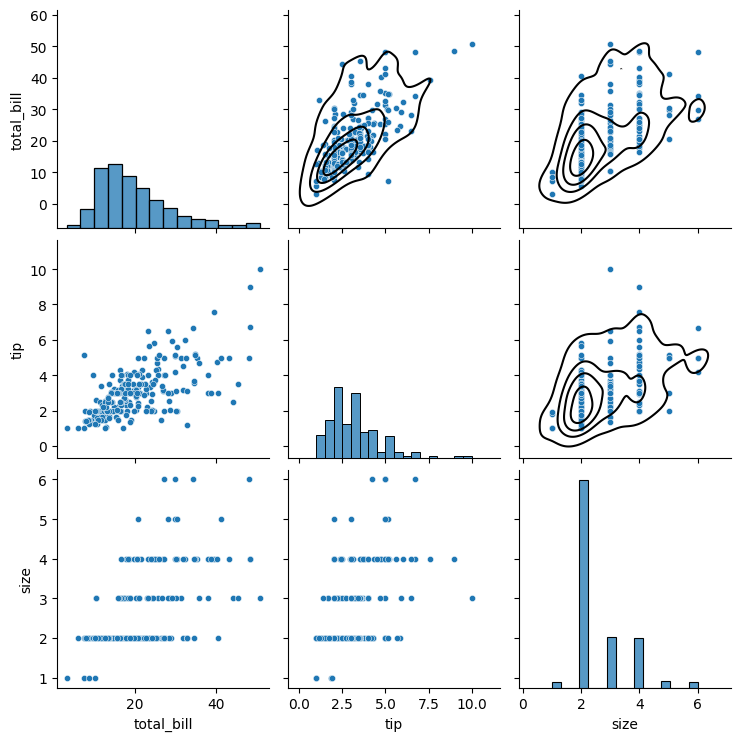

In [47]:
g = sns.pairplot(tips,
                 plot_kws={'s':20})

g.map_upper(sns.kdeplot,
            n_levels=5,
            color='black');

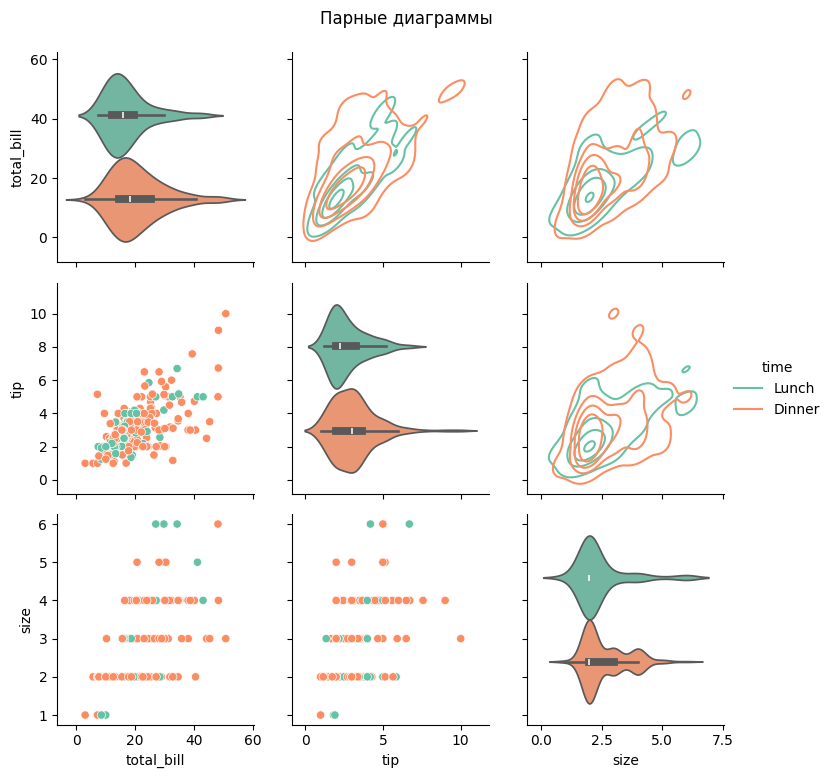

In [41]:
g = sns.PairGrid(tips, hue='time', palette='Set2')
g.map_diag(sns.violinplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot,
            n_levels=5)
g.add_legend()
g.fig.suptitle('Парные диаграммы', y=1.03);

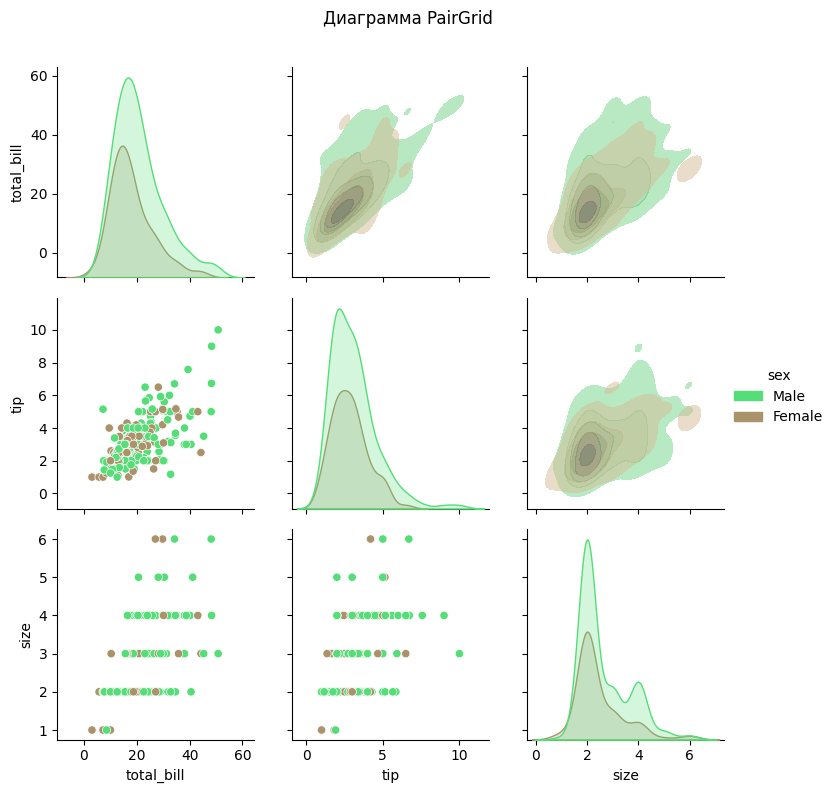

In [66]:
g = sns.PairGrid(tips, hue='sex', diag_sharey=False, palette='terrain')
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot, n_levels=5, fill=True, alpha=0.5)
g.map_diag(sns.kdeplot, fill=True)
g.fig.suptitle('Диаграмма PairGrid', y=1.05)
g.add_legend()
plt.show()